<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/tensor_flow_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# introductin to regression with neurl networks in tensorflow

there are many diefineitoin f a regression problmen but in our case were goitn to simplify it: predicting a numerical varialbe based on some outehr cominatin of variables even shorter .. predicitng a number

In [2]:
tf.__version__

'2.17.1'

## creatdata toview and fit

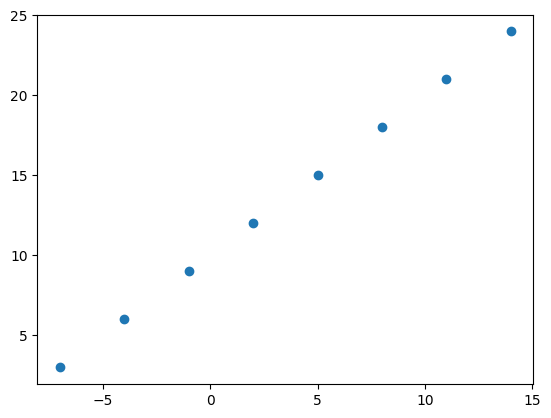

In [21]:
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create lables
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
# visulaize it
plt.scatter(X,y)

In [22]:
y == (X + 10)
''' this is the relationship i want my model to fingure it out  '''

' this is the relationship i want my model to fingure it out  '

## INput and output shapes

In [23]:
X.shape, y.shape

((8,), (8,))

In [24]:
# create a demo tensor for our housign price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [25]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [26]:
X[0],y[0]

(-7.0, 3.0)

In [27]:
X[0].ndim

0

In [28]:
X[0],y[0]

(-7.0, 3.0)

In [29]:
# turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [30]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [31]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

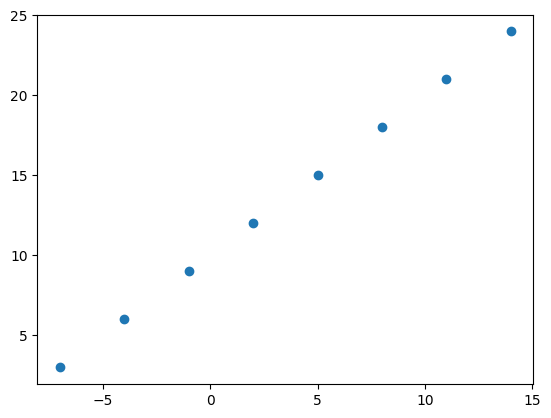

In [32]:
plt.scatter(X,y)

## stps in modelling with tensorflow

1. create  model - define the input and output layes , as well as the hidden layers of a deep learnign model
2. compile a model - define the loss function , and optimzer and also the evaluation metrics ( what w e can use to interpret the performnace of our model).
3. fittign a model - letting the model to try to find y given X

In [48]:
# set the radnom seed
tf.random.set_seed(42)
# create a model using the sequenctial api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)# the output of this layer is one
])
# compile the model
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics = ['mae'])
# fit the model
# let first expand the dimension for our model
X = tf.expand_dims(X,axis = -1)
model.fit(X,y,epochs = 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - loss: 14.2204 - mae: 14.2204
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 14.0879 - mae: 14.0879
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.9554 - mae: 13.9554
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.8229 - mae: 13.8229
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.6904 - mae: 13.6904
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.5579 - mae: 13.5579
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.4254 - mae: 13.4254
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.2929 - mae: 13.2929
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.1604 - mae: 13.1604
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.0279 - mae: 13.0279
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 12.8954 - mae: 12.8954
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 12.7629 - mae: 12.7629
Epoch 13/100
1/1 ━━━━━━━━

In [39]:
# check out X and y
X, y

(<tf.Tensor: shape=(8, 1, 1), dtype=float64, numpy=
 array([[[-7.]],
 
        [[-4.]],
 
        [[-1.]],
 
        [[ 2.]],
 
        [[ 5.]],
 
        [[ 8.]],
 
        [[11.]],
 
        [[14.]]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [43]:
# try and make a prediction using our model
model.predict([tf.expand_dims(tf.constant([17.0]),axis = -1)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[[15.900496]]], dtype=float32)

## imporve our model
we can imporve our model , by altering the steps we took to create a model

1. **creating a model** - hrer we might add more layesr, increase the num ber o hidden untis , within each of the hidden layes, change the activation function of each layer
2. **computing a model** - here we might change the optimizatin function or perhaps the **learing rate** of the optimzation function.
3. **fitting a model** - here we might fit a mode for more epochs


In [57]:
# let me write a more imporved model
model = tf.keras.Sequential([
       tf.keras.layers.Dense(64, activation='linear'),
       tf.keras.layers.Dropout(0.2),  # Example of dropout
       tf.keras.layers.Dense(32, activation='linear'),
       tf.keras.layers.Dense(1, activation='linear')  # Output layer
   ])
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),metrics = ['mae'])

lets break down our model
the first hidden layer is a dnsely connected layer. this measn each neuron in this layer recives inputs from all the neurons in the previous layer( which is the input layer in this case).
it has 63 neurons(or units) the higher the number of neurons , teh more complex patterns thelayer can learn.
it uses the ReLU (rectified Linear unit) activation function . Relu introduces non-linearity into the model . it outpus the input directly if it is poistive


`tf.keras.layers.Dropout(0.2)`:
this is a dropout layer used for regularizaion. it helps prevent overfitting( where the model performs well on training ata but poorly on unseen data).
during training , it randomly sets 20% (o.2) of the inptu units to 0 at each update during graingin time, which helps prevent overrelienc on any single neuron and encorage the network to learn more robust features.



In [58]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
X = tf.constant(X,dtype=tf.float32)
y = tf.constant(y,dtype=tf.float32)
X = tf.expand_dims(X,axis = -1)
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.3187 - mae: 12.3187
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 44.2643 - mae: 44.2643
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 17.8505 - mae: 17.8505
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15.1827 - mae: 15.1827
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.1517 - mae: 7.1517
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.3097 - mae: 11.3097
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.2136 - mae: 7.2136
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.0430 - mae: 11.0430
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 16.2112 - mae: 16.2112
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.4616 - mae: 12.4616
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.9619 - mae: 2.9619
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.5077 - mae: 10.5077
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━

In [60]:
model.predict(tf.expand_dims(tf.constant([-23.0]),axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[-10.937994]], dtype=float32)

## Evaluatng a model

in practice, a typical workflowyoull go through when  building a neural netwrorks is:
```
build a model -> fit it -> evaluat it -> tweak a model -> fit it -> evaluate it ..
```

In [61]:
from tensorflow.keras.utils import plot_model

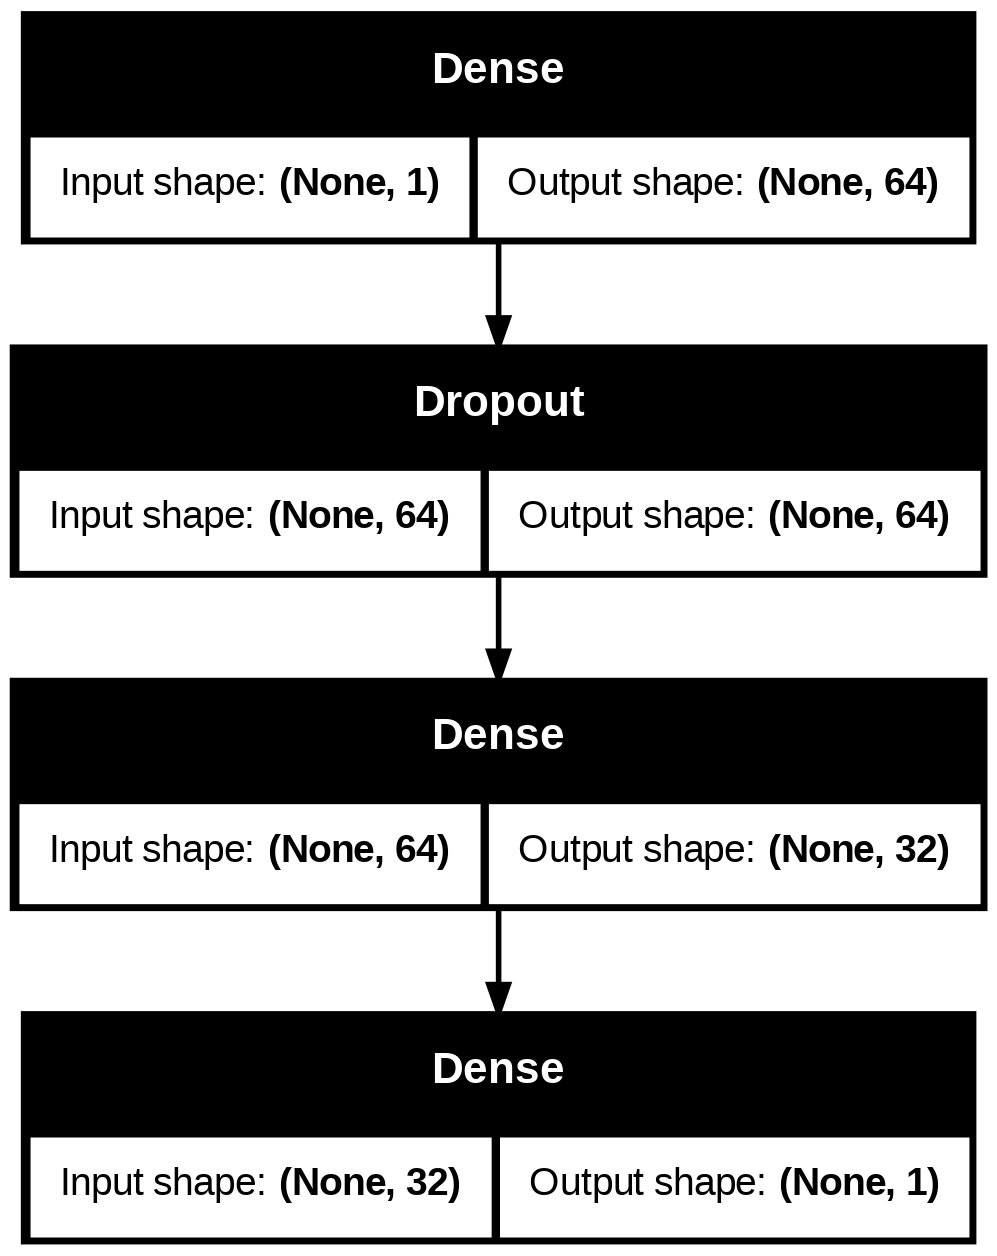

In [62]:
plot_model(model,show_shapes = True)

In [63]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)